# Modeling Notebook

## First Model - 0.5 correlation or higher

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
train_df1 = pd.read_csv('./datasets/clean_train.csv')
test_df1 = pd.read_csv('./datasets/clean_test.csv')

In [4]:
pd.set_option('display.max_columns', 101)

In [5]:
train_df1.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y
0,109,533352170,60,RL,68.0,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,3,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,1976.0,2.0,475.0,TA,3,0,44,0,0,0,0,0,3,2010,WD,130500,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,4,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,1997.0,2.0,559.0,TA,3,0,74,0,0,0,0,0,4,2009,WD,220000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007,CompShg,VinylSd,VinylSd,None,0.0,3,4,3,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,1953.0,1.0,246.0,TA,3,0,52,0,0,0,0,0,1,2010,WD,109000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007,CompShg,VinylSd,VinylSd,None,0.0,3,3,4,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,2007.0,2.0,400.0,TA,3,100,0,0,0,0,0,0,4,2010,WD,174000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993,CompShg,Wd Sdng,Plywood,None,0.0,3,3,2,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,1957.0,2.0,484.0,TA,3,0,59,0,0,0,0,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


<Figure size 576x576 with 0 Axes>

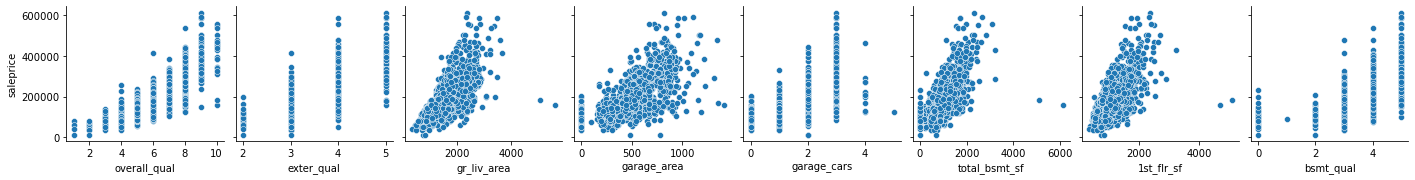

In [11]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df1, x_vars=['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 
                                'total_bsmt_sf', '1st_flr_sf', 'bsmt_qual'], 
            y_vars=['saleprice'])

<Figure size 576x576 with 0 Axes>

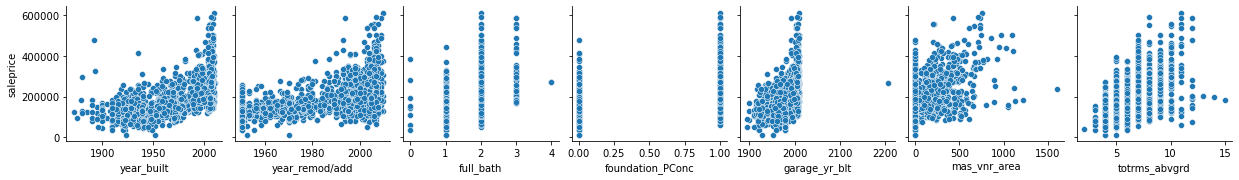

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(train_df1, x_vars=['year_built', 'year_remod/add', 'full_bath', 'foundation_PConc', 'garage_yr_blt', 
                                'mas_vnr_area', 'totrms_abvgrd'], 
            y_vars=['saleprice'])

In [40]:
features1 = ['overall_qual', 'exter_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 
            'bsmt_qual', 'year_built', 'year_remod/add', 'full_bath', 'foundation_PConc', 'garage_yr_blt', 
            'mas_vnr_area', 'totrms_abvgrd']
X = train_df1[features1]
y = train_df1['saleprice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [43]:
cross_val_score(lr1, X_train, y_train).mean()

0.785693503137542

In [44]:
lr1.score(X_train, y_train)

0.7998856327092148

In [45]:
lr1.score(X_test, y_test)

0.8358063427250041

In [46]:
preds1 = lr1.predict(test_df1[features1])

In [47]:
test_df1['saleprice'] = preds1

In [48]:
test_df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1910.0,1,440,Po,1,0,60,112,0,0,0,0,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,150701.821916
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,1977.0,2,580,TA,3,170,0,0,0,0,0,0,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,207162.267911


In [49]:
kaggle1 = test_df1[['id', 'saleprice']]

In [50]:
kaggle1.to_csv('./datasets/kaggle1_sub.csv', index=False)

---

## 2nd Model - all numeric data

In [55]:
features2 = [c for c in train_df1._get_numeric_data().columns if c != 'saleprice']  # <- code from model workflow lecture
X2 = train_df1[features2]
y2 = train_df1['saleprice']

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [57]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [58]:
cross_val_score(lr2, X2_train, y2_train).mean()

0.7713979671288601

In [59]:
lr2.score(X2_train, y2_train)

0.8515551169967555

In [60]:
lr2.score(X2_test, y2_test)

0.8681545367322696

In [61]:
preds2 = lr2.predict(test_df1[features2])

In [62]:
test_df1['saleprice'] = preds2

In [63]:
test_df1.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod/add,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_yr_blt,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,street_Pave,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,garage_finish_NA,garage_finish_RFn,garage_finish_Unf,paved_drive_P,paved_drive_Y,saleprice
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0.0,3,2,2,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,1910.0,1,440,Po,1,0,60,112,0,0,0,0,4,2006,WD,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,162833.508917
1,2718,905108090,90,RL,68.0,9662,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,5,4,1977,1977,CompShg,Plywood,Plywood,None,0.0,3,3,4,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,1977.0,2,580,TA,3,170,0,0,0,0,0,0,8,2006,WD,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,156238.027464


In [64]:
kaggle2 = test_df1[['id', 'saleprice']]

In [65]:
kaggle2.to_csv('./datasets/kaggle2_sub.csv', index=False)

---